### This Notebook is used for testing a simple linear regression model & its utility functions 

## 1.Importing libraries and the dataset

In [5]:
%load_ext autoreload
%autoreload 2

import sys
import os

def find_project_root(current_dir, root_dir_name='Ynn'):
    """向上遍历目录树以找到项目根目录"""
    while True:
        parent_dir, dir_name = os.path.split(current_dir)
        if dir_name == root_dir_name:
            return current_dir
        if parent_dir == current_dir:  # 到达了文件系统的根目录
            raise FileNotFoundError(f"项目根目录 '{root_dir_name}' 未找到")
        current_dir = parent_dir

try:
    current_work_dir = os.getcwd()
    project_root = find_project_root(current_work_dir)

    if project_root not in sys.path:
        sys.path.append(project_root)

    from src.util import *  # 现在可以导入 util.py 中的函数了

except FileNotFoundError as e:
    print(e)
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 2. Load Data

In [10]:
# load data
# file_path = 'data/house_price'
print
file_path = 'multiple_featuresGD.txt'
data = np.genfromtxt(file_path, delimiter=',', skip_header=1)

# 分离特征和目标变量
x_train = data[:, :-1]  # 选择除最后一列之外的所有列
y_train = data[:, -1]   # 选择最后一列



## 3. Visiualize Data

In [11]:
def showGraph(x_train, y_train):
    # 提取用于绘图的数据
    rooms = x_train[:, 1]  # 房间数
    area = x_train[:, 0]   # 房屋面积
    price = y_train        # 价格

    # 创建绘图
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    # 房间数 vs 价格
    ax[0].scatter(rooms, price, color='blue')
    ax[0].set_title('Rooms vs Price')
    ax[0].set_xlabel('Number of Rooms')
    ax[0].set_ylabel('Price ($)')

    # 房屋面积 vs 价格
    ax[1].scatter(area, price, color='red')
    ax[1].set_title('Area vs Price')
    ax[1].set_xlabel('House Area (sqft)')
    ax[1].set_ylabel('Price ($)')

    # 显示图形
    plt.tight_layout()
    plt.show()


In [12]:
print("Shape of the dataset:", data.shape)
print("x_train:\n", x_train)
print("y_train:\n", y_train)



Shape of the dataset: (47, 3)
x_train:
 [[2.104e+03 3.000e+00]
 [1.600e+03 3.000e+00]
 [2.400e+03 3.000e+00]
 [1.416e+03 2.000e+00]
 [3.000e+03 4.000e+00]
 [1.985e+03 4.000e+00]
 [1.534e+03 3.000e+00]
 [1.427e+03 3.000e+00]
 [1.380e+03 3.000e+00]
 [1.494e+03 3.000e+00]
 [1.940e+03 4.000e+00]
 [2.000e+03 3.000e+00]
 [1.890e+03 3.000e+00]
 [4.478e+03 5.000e+00]
 [1.268e+03 3.000e+00]
 [2.300e+03 4.000e+00]
 [1.320e+03 2.000e+00]
 [1.236e+03 3.000e+00]
 [2.609e+03 4.000e+00]
 [3.031e+03 4.000e+00]
 [1.767e+03 3.000e+00]
 [1.888e+03 2.000e+00]
 [1.604e+03 3.000e+00]
 [1.962e+03 4.000e+00]
 [3.890e+03 3.000e+00]
 [1.100e+03 3.000e+00]
 [1.458e+03 3.000e+00]
 [2.526e+03 3.000e+00]
 [2.200e+03 3.000e+00]
 [2.637e+03 3.000e+00]
 [1.839e+03 2.000e+00]
 [1.000e+03 1.000e+00]
 [2.040e+03 4.000e+00]
 [3.137e+03 3.000e+00]
 [1.811e+03 4.000e+00]
 [1.437e+03 3.000e+00]
 [1.239e+03 3.000e+00]
 [2.132e+03 4.000e+00]
 [4.215e+03 4.000e+00]
 [2.162e+03 4.000e+00]
 [1.664e+03 2.000e+00]
 [2.238e+03 3.000

## 4. Preprocessing Data

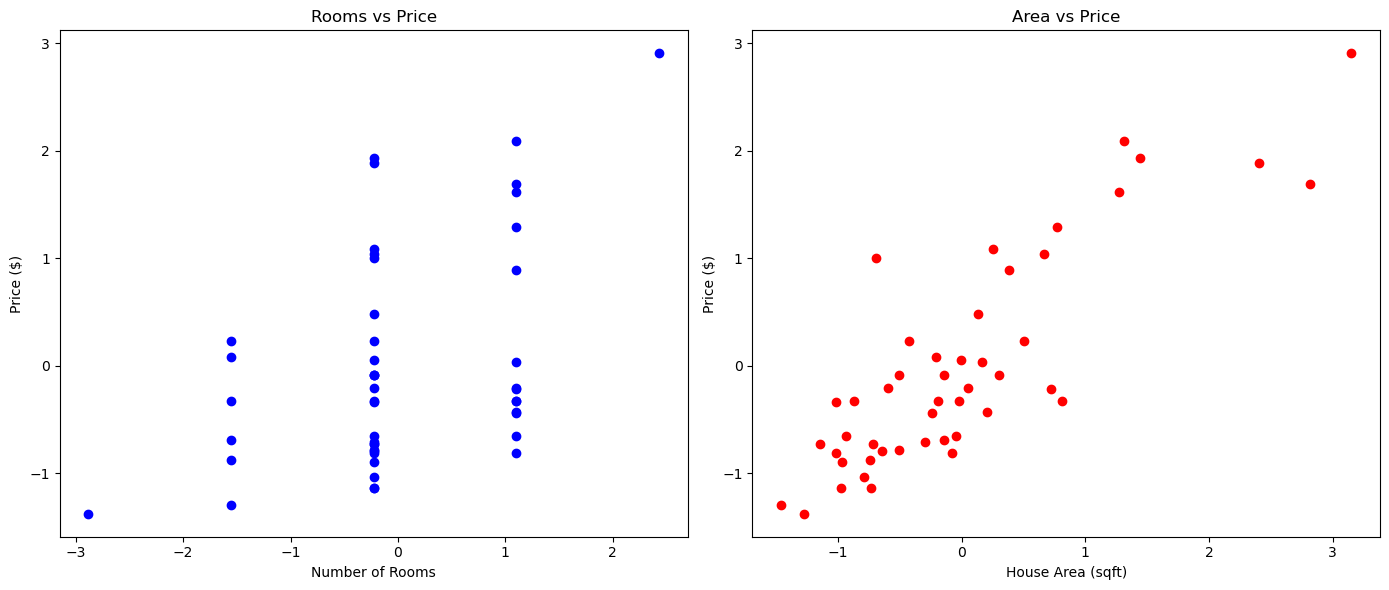

In [13]:
x_train = feature_scaling(x_train,'z-score')
y_train = feature_scaling(y_train,'z-score')

showGraph(x_train, y_train)

In [14]:
# set parameters
featurs=x_train.shape[1] # extract the number of features
# make sure the shape of w is same as the number of features
initial_w = np.zeros(featurs) 
initial_b = 0           # b shoule be a number, not a vector
learning_rate = 1e-3
num_iterations = 10000


In [15]:
# do simple linear regression
w_final, b_final = regression(x_train, y_train,
                                                 initial_w, initial_b, learning_rate, num_iterations,mode='linear')

Performing linear regression
Iteration    0: W [0.00085499 0.00044226],B-6.614094614788167e-20, Cost     0.50
Iteration   10: W [0.00934448 0.00481447],B-9.448706592554524e-19, Cost     0.49
Iteration   20: W [0.01772532 0.0090961 ],B-1.809427312474191e-18, Cost     0.48
Iteration   30: W [0.02599909 0.01328866],B-2.643275669267128e-18, Cost     0.47
Iteration   40: W [0.03416733 0.01739362],B-3.427518316449154e-18, Cost     0.46
Iteration   50: W [0.04223159 0.02141245],B-4.294437146316033e-18, Cost     0.46
Iteration   60: W [0.05019339 0.02534657],B-5.1897020959605734e-18, Cost     0.45
Iteration   70: W [0.0580542  0.02919739],B-6.05898310247559e-18, Cost     0.44
Iteration   80: W [0.06581549 0.03296632],B-6.8951936359166666e-18, Cost     0.43
Iteration   90: W [0.07347872 0.0366547 ],B-7.830615588579564e-18, Cost     0.43
Iteration  100: W [0.08104529 0.04026389],B-8.598322999224617e-18, Cost     0.42
Iteration  110: W [0.08851662 0.04379521],B-9.495950125517294e-18, Cost     0.4

## 5. Test Model

In [16]:
# prdicting the price of a house based on its areap
def predict_price(x_test, w, b):
    return np.dot(x_test, w) + b

# test the model
predict_price=predict_price(x_train, w_final, b_final)
print('Shape of the predicted price:', predict_price.shape)
print('Shape of the Original price:', y_train.shape)
print('Shape of the trainting examples:', x_train.shape)


mse = mean_squared_error(y_train, predict_price)
print('Mean Squared Error:', mse)

# 计算 RMSE
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

# 计算 R^2 Score
r2 = r2_score(y_train, predict_price)
print('R^2 Score:', r2)

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_train)), y_train, color='blue', label='Original Price', alpha=0.7)
plt.scatter(range(len(predict_price)), predict_price, color='red', label='Predicted Price', alpha=0.7)
plt.title('Comparison of Original and Predicted Prices')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.show()

Shape of the predicted price: (47,)
Shape of the Original price: (47,)
Shape of the trainting examples: (47, 2)


NameError: name 'mean_squared_error' is not defined